In [1]:
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create database path variable
db_path = "Resources/hawaii.sqlite"


In [5]:
# create engine to hawaii.sqlite
engine = create_engine(f"sqlite:///{db_path}")
engine

Engine(sqlite:///Resources/hawaii.sqlite)

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with = engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

Text(0.5, 0, 'Date')

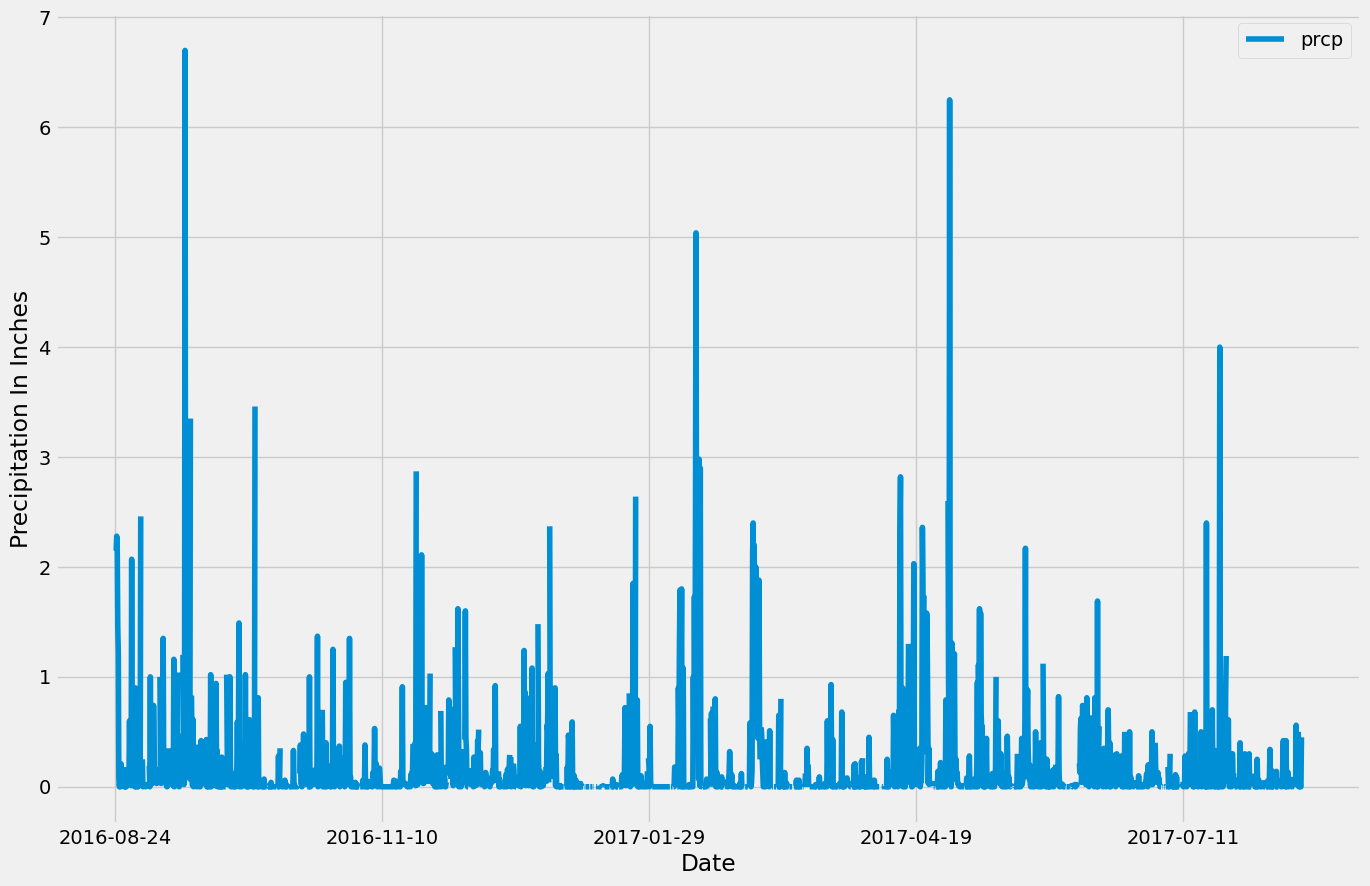

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
previous_year = dt.date(2017,8,23)-dt.timedelta(days=365)
previous_year

# Perform a query to retrieve the date and precipitation scores
precipitation_date = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > previous_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_date_df = pd.DataFrame(precipitation_date)
precipitation_date_df.set_index("date",inplace=True)
# Sort the dataframe by date
precipitation_date_df.sort_index(inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data

precipitation_date_df.plot(figsize=(15,10))
plt.ylabel("Precipitation In Inches")
plt.xlabel("Date")


In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_date_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Station.station).count()
print(f"Total Number of Stations: {station_count}")

Total Number of Stations: 9


In [14]:
stations = session.query(Measurement.station,func.count(Measurement.station))\
.group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_temp = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
station_temp


[(54.0, 85.0, 71.66378066378067)]

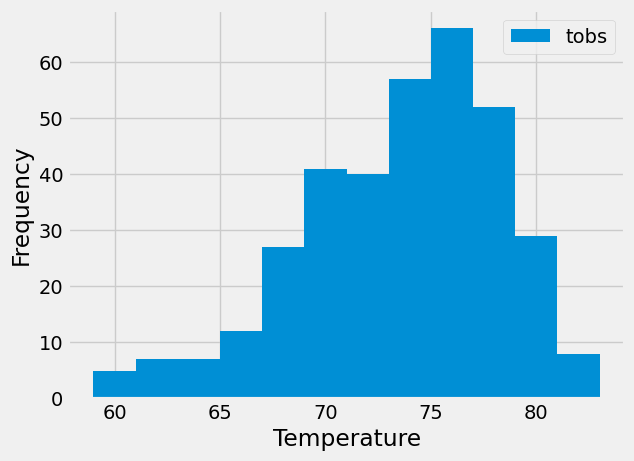

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
previous_year = dt.date(2017,8,23)-dt.timedelta(days=365)
most_active_temp = session.query(Measurement.tobs).filter(Measurement.date > previous_year).filter(Measurement.station=='USC00519281').all()
# Before plotting, convert to DataFrame
most_active_df = pd.DataFrame(most_active_temp,columns=["tobs"])
most_active_df.plot.hist(bins=12)
plt.xlabel("Temperature")
plt.show()

# Close session

In [17]:
# Close Session
session.close()